# Task 4: Introduction to Deep Learning with TensorFlow & Keras

## Section 1: Setup & Dataset

### **Task 1**: Import Dependencies and Load Data
*Instruction*: Use the MNIST dataset (handwritten digit classification). Load it from tf.keras.datasets and normalize the pixel values.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and normalize
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Section 2: Data Exploration

### **Task 2**: Visualize Sample Images

*Instruction*: Plot the first 10 images with their corresponding labels.


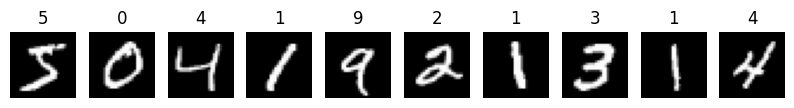

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

## Section 3: Build a Neural Network

### **Task 3**: Define a Simple MLP Model

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Input layer (flatten)
*   2 hidden layers (128, 64 neurons) with ReLU
*   Output layer with softmax


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

model = Sequential([
    Input(shape=(28, 28)),  # Define input shape here
    Flatten(),  # Flatten layer
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

## Section 4: Compile & Train

### **Task 4**: Compile and Fit the Model

*Instruction*: Compile using `adam` optimizer and `sparse_categorical_crossentropy` as loss function. Train for 10 epochs.

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8721 - loss: 0.4468 - val_accuracy: 0.9678 - val_loss: 0.1088
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9666 - loss: 0.1127 - val_accuracy: 0.9747 - val_loss: 0.0878
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9772 - loss: 0.0742 - val_accuracy: 0.9765 - val_loss: 0.0812
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9829 - loss: 0.0539 - val_accuracy: 0.9767 - val_loss: 0.0812
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9872 - loss: 0.0407 - val_accuracy: 0.9760 - val_loss: 0.0920
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9893 - loss: 0.0338 - val_accuracy: 0.9793 - val_loss: 0.0799
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9908 - loss: 0.0289 - val_accuracy: 0.9753 - val_loss: 0.0992
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9931 - loss: 0.02

## Section 5: Evaluate the Model

### **Task 5**:  Test Accuracy and Confusion Matrix

*Instruction*: Evaluate the model on the test set and print confusion matrix.


In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

y_pred = np.argmax(model.predict(X_test), axis=1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.1125
Test Accuracy: 0.98
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 973    0    0    1    1    1    1    0    1    2]
 [   0 1132    1    0    0    1    0    0    1    0]
 [   5    3 1001    5    2    0    3    9    3    1]
 [   0    0    6  990    0    3    0    3    1    7]
 [   2    1    4    0  956    0    5    2    0   12]
 [   4    0    0   10    1  870    1    2    2    2]
 [   5    3    0    1    3    6  935    0    4    1]
 [   1    8    6    1    1    0    0 1001    1    9]
 [   2    0    4    8    4    5    2    3  939    7]
 [   2    3    0    1   10    2    0    1    0  990]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
        

## Section 6: Plot Training History

### **Task 6**: Visualize Accuracy and Loss

*Instruction*: Plot training vs validation accuracy and loss over epochs.

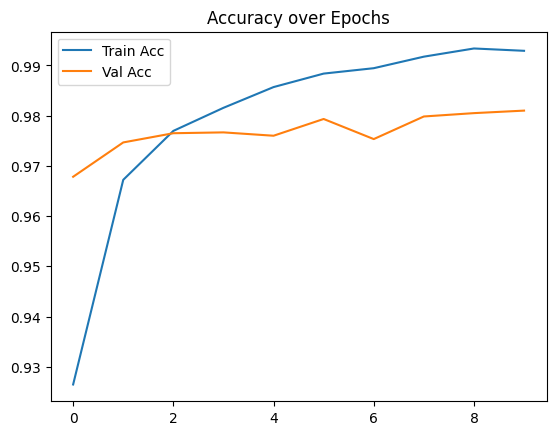

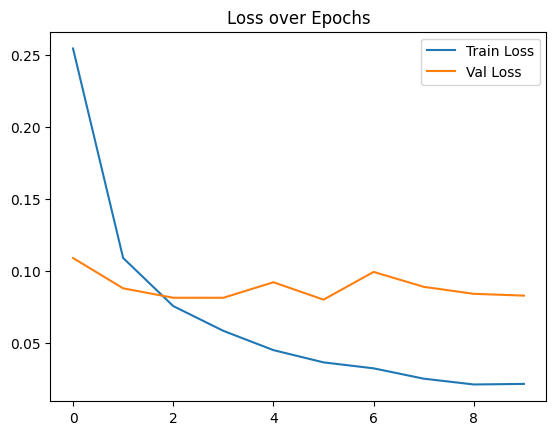

In [7]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()